In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

import time

LABEL_INDEX = 14

In [2]:
full_dataset = pd.read_hdf("./events_anomalydetection_v2.features.h5")
dataset = pd.concat([full_dataset[:10**5], full_dataset[-1*10**4:]])

In [3]:
data_set = full_dataset.iloc[:, 0:LABEL_INDEX].values
is_signal = lambda i: i > 10**6
sc = StandardScaler()
scaled_data_set = sc.fit_transform(data_set)

In [45]:
## Isolation Forest - 13% with not labled data
# iso_forest = IsolationForest(n_estimators=100, random_state=0, contamination=0.09)
# start 1630222397.433131
# fitted 1630222465.3936949
# predicted 1630222560.592811
# total tested 1100000
# found signal 99000
# real  signal 13307
# ratio signal 0.1344141414141414

iso_forest = IsolationForest(n_estimators=100, random_state=0, contamination=1)
iso_forest.fit(scaled_data_set)
iso_y_pred = iso_forest.predict(scaled_data_set)

iso_pred_signal = [i for i in range(len(iso_y_pred)) if iso_y_pred[i] != 1]
count_real_signal = len([i for i in iso_pred_signal if is_signal(i)])
real_signal = [i for i in range(len(scaled_data_set)) if is_signal(i)]

print(f"total tested: {len(iso_y_pred)}")
print(f"found signal: {len(iso_pred_signal)}")
print(f"real  signal: {count_real_signal}")
print(f"ratio signal (precision): {count_real_signal / len(iso_pred_signal)}")
print(f"recall: {count_real_signal/len(real_signal)}")
os.system("printf '\a'")

total tested: 1100000
found signal: 1099999
real  signal: 99999
ratio signal (precision): 0.0909082644620586
recall: 1.0


0

In [42]:
real_signal = [i for i in range(len(scaled_data_set)) if is_signal(i)]
print(f"recall: {count_real_signal/len(real_signal)}")
print(f"original ratio signal: {len(real_signal) / len(scaled_data_set)}")


recall: 0.45304453044530446
original ratio signal: 0.09090818181818182


In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(scaled_data_set)
print(pca.explained_variance_ratio_)
res= pd.DataFrame(pca.transform(scaled_data_set))
Z = np.array(res)
os.system("printf '\a'")

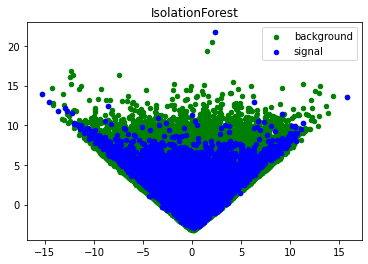

0

In [31]:
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
real_signal = [i for i in range(len(scaled_data_set)) if is_signal(i)]

b1 = plt.scatter(res[0], res[1], c='green', s=20,label="all")
b1 = plt.scatter(res.iloc[real_signal,0],res.iloc[real_signal,1], c='blue', s=20,label="signal")

# b1 = plt.scatter(res.iloc[iso_pred_signal,0],res.iloc[iso_pred_signal,1], c='red',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()
os.system("printf '\a'")

In [34]:
print(scaled_data_set[0])

[-1.46386328  0.60784856  0.44300682 -1.09704489 -0.92648639 -1.02988347
 -1.10588358  1.5850945  -0.7592516  -0.38759992  0.18927831 -0.38256112
 -0.69313209 -0.68022317]


[0.24897956 0.23736843 0.14137935]


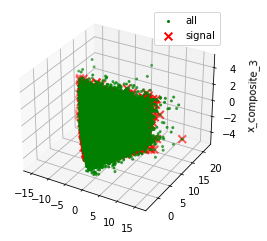

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(3)
pca.fit(scaled_data_set)
print(pca.explained_variance_ratio_)
res= pd.DataFrame(pca.transform(scaled_data_set))
real_signal = [i for i in range(len(scaled_data_set)) if is_signal(i)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(res[0], res[1], zs=res[2], s=4, lw=1, label="all",c="green")
# Plot x's for the ground truth outliers
ax.scatter(res.iloc[real_signal,0],res.iloc[real_signal,1],res.iloc[real_signal,2],
           lw=2, s=60, marker="x", c="red", label="signal")
ax.legend()
plt.show()

In [28]:
data = open('./mayo_events', 'r').read()
second_dataset = [[float(j) for j in i.split(',')] for i in data.split('\n') if len(i) > 0]
sorted_second_dataset = sorted(second_dataset, key = lambda i: i[3])
first_signal_index = len(sorted_second_dataset) - sum([i[3] for i in sorted_second_dataset])
SECOND_LABEL_INDEX = 3

In [29]:
second_data_set = [i[0 : SECOND_LABEL_INDEX] for i in sorted_second_dataset]
is_signal = lambda i: i > first_signal_index
sc = StandardScaler()
second_scaled_data_set = sc.fit_transform(second_data_set)

In [39]:
for j in range(4, 50):
    float_i = j * 0.02
    print("**********")
    print(f"contamination: {float_i}")
    s_iso_forest = IsolationForest(n_estimators=100, random_state=0, contamination=float_i)
    s_iso_forest.fit(second_scaled_data_set)
    s_iso_y_pred = s_iso_forest.predict(second_scaled_data_set)

    s_iso_pred_signal = [i for i in range(len(s_iso_y_pred)) if s_iso_y_pred[i] != 1]
    count_real_signal = len([i for i in s_iso_pred_signal if is_signal(i)])
    real_signal = [i for i in range(len(second_scaled_data_set)) if is_signal(i)]

    print(f"total tested: {len(s_iso_y_pred)}")
    print(f"found signal: {len(s_iso_pred_signal)}")
    print(f"real  signal: {count_real_signal}")
    print(f"ratio signal (precision): {count_real_signal / len(s_iso_pred_signal)}")
    print(f"recall: {count_real_signal/len(real_signal)}")
    print("**********")

**********
contamination: 0.08
total tested: 1100288
found signal: 88022
real  signal: 8317
ratio signal (precision): 0.0944877417009384
recall: 0.0831475501614564
**********
**********
contamination: 0.1
total tested: 1100288
found signal: 110029
real  signal: 11657
ratio signal (precision): 0.1059447963718656
recall: 0.11653853459565917
**********
**********
contamination: 0.12
total tested: 1100288
found signal: 132035
real  signal: 14916
ratio signal (precision): 0.11297004582118378
recall: 0.14911973767082887
**********
**********
contamination: 0.14
total tested: 1100288
found signal: 154040
real  signal: 18218
ratio signal (precision): 0.11826798234224876
recall: 0.18213082467733713
**********
**********
contamination: 0.16
total tested: 1100288
found signal: 176044
real  signal: 21782
ratio signal (precision): 0.12373043102860648
recall: 0.2177612044747918
**********
**********
contamination: 0.18
total tested: 1100288
found signal: 198051
real  signal: 25301
ratio signal (prec

In [18]:
print(len(sorted_second_dataset) - sum([i[3] for i in sorted_second_dataset]))
print(len(sorted_second_dataset))

1374.0
1512


In [19]:
print(1512-1374)

138


In [20]:
print(138/1512)

0.09126984126984126


[0.39006274 0.33385671]


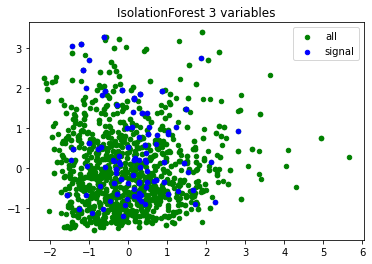

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(second_scaled_data_set)
print(pca.explained_variance_ratio_)
res= pd.DataFrame(pca.transform(second_scaled_data_set))
plt.title("IsolationForest 3 variables")
real_signal = [i for i in range(len(second_scaled_data_set)) if is_signal(i)]

b1 = plt.scatter(res[0], res[1], c='green', s=20,label="all")
b1 = plt.scatter(res.iloc[real_signal,0],res.iloc[real_signal,1], c='blue', s=20,label="signal")

# b1 = plt.scatter(res.iloc[iso_pred_signal,0],res.iloc[iso_pred_signal,1], c='red',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [27]:
%matplotlib notebook
real_signal = [second_scaled_data_set[i] for i in range(len(second_scaled_data_set)) if is_signal(i)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(list(map(lambda i: i[0], second_scaled_data_set)), list(map(lambda i: i[1], second_scaled_data_set)), zs=list(map(lambda i: i[2], second_scaled_data_set)), s=4, lw=1, label="all",c="green")
# Plot x's for the ground truth outliers
ax.scatter(list(map(lambda i: i[0], real_signal)), list(map(lambda i: i[1], real_signal)), list(map(lambda i: i[2], real_signal)),
           lw=2, s=60, marker="x", c="red", label="signal")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>